In [1]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


2024-01-04 10:34:39.506649: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 10:34:39.819266: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 10:34:39.819384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 10:34:39.877484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 10:34:40.000204: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 10:34:40.006183: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load the dataset from internet
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
# Scale the label values
scale_factor = 1000.0

    #Scale the training set`s label
train_df["median_house_value"] /= scale_factor

    #Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [4]:
# Build the model
def build_model(my_learning_rate):
    """create the easy linear regression model by using sequential"""
    model = tf.keras.models.Sequential()
    
    # add a linear layer to the model to yield a simple linear regressor
    
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    
    #compile the model that TensorFlow can efficiently execute
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate = my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

#Train the model
def train_model(model, df, feature, label, my_epochs,
               my_batch_size=None, my_validation_split=0.1):
    
    history = model.fit(x= df[feature],
                       y= df[label],
                       batch_size = my_batch_size,
                       epochs = my_epochs,
                       validation_split = my_validation_split)
    
    #the model's trained weight and bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    #the list of epochs is stored separately from the rest of history
    epochs = history.epoch
    
    #Isolate the RMSE for each epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return epochs, rmse, history.history
    
    

## Define the plotting function

In [5]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs[1:], mae_training[1:], label="Training loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation loss")
    plt.legend()
    
    
    """I'm not going to plot the first epoch, because the loss on the first epoch is often greater then 
    the loss on other epoch"""
    
    merged_mae_list = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_list)
    lowest_loss = min(merged_mae_list)
    delta = highest_loss - lowest_loss
    print(delta)
    
    top_of_y_axis = highest_loss + (delta * 0.5)
    bottom_of_y_axis = lowest_loss + (delta * 0.5)
    
    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()
    

Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 11641.6943 - root_mean_squared_error: 107.8967 - val_loss: 8994.8438 - val_root_mean_squared_error: 94.8411
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 6531.7808 - root_mean_squared_error: 80.8194 - val_loss: 8978.4023 - val_root_mean_squared_error: 94.7544
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 6533.8242 - root_mean_squared_error: 80.8321 - val_loss: 9701.0527 - val_root_mean_squared_error: 98.4939
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 6532.8486 - root_mean_squared_error: 80.8260 - val_loss: 9021.1211 - val_root_mean_squared_error: 94.9796
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 6535.7334 - root_mean_squared_error: 80.8439 - val_loss: 9317.0605 - val_root_mean_squared_error: 96.5249
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6527.3193 - root_mean_sq

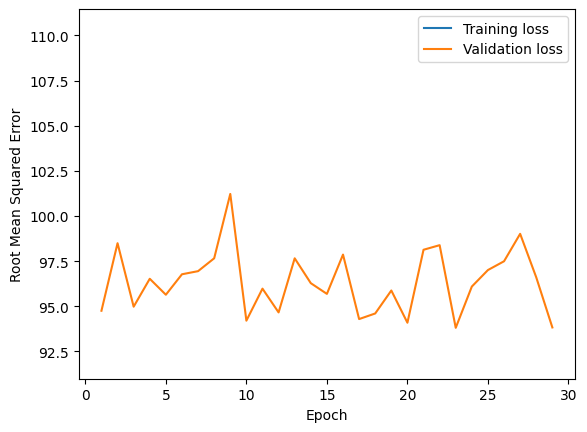

In [6]:
#hyperparamets
learning_rate = 0.8
epochs = 30
batch_size = 100

validation_split = 0.2

my_feature = "median_income"
my_label = "median_house_value"

#Invoke our buildng and training functions
my_model = build_model(learning_rate)
epochs,rmse, history = train_model(my_model, train_df, my_feature,
                                  my_label, epochs, batch_size,
                                  validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                   history["val_root_mean_squared_error"])
